# YOLO-NAS Starter Notebook

<img src="https://learnopencv.com/wp-content/uploads/2023/05/yolo-nas_cover.gif">

Deep learning firm <a href="https://deci.ai/">Deci.ai</a> has recently launched YOLO-NAS. This deep learning model delivers superior real-time object detection capabilities and high performance ready for production. These models were constructed using Deci’s proprietary AutoNAC™ NAS technology. YOLO-NAS is a new real-time state-of-the-art object detection model that outperforms YOLOv7, YOLOv8 & the recently released YOLOv6 3.0 models in terms of mAP and inference latency.


## Download Assets

In [ ]:
# https://drive.google.com/file/d/1mk_NJsrvSvwiOh553urifpaJKIzsyDxE/view?usp=share_link

!gdown 1mk_NJsrvSvwiOh553urifpaJKIzsyDxE
!unzip -qq /content/Yolo-nas-test-assets.zip

Downloading...
From: https://drive.google.com/uc?id=1mk_NJsrvSvwiOh553urifpaJKIzsyDxE
To: /content/Yolo-nas-test-assets.zip
100% 35.5M/35.5M [00:00<00:00, 108MB/s]


## Install required libraries

In [ ]:
%%capture
!pip install -qU super-gradients imutils
!pip install pytube
!pip install torchview torchinfo

# Restart runtime

## Imports

In [ ]:
import gc
import os
import torch
from torchinfo import summary
from super_gradients.training import models

os.makedirs("predictions", exist_ok=True)

[2023-05-09 06:33:06] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it


The console stream is logged into /root/sg_logs/console.log


[2023-05-09 06:33:14] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-05-09 06:33:14] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-05-09 06:33:14] WARNING - export.py - Failed to import pytorch_quantization
[2023-05-09 06:33:14] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization


## Display Model Summary

In [ ]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
model = models.get("yolo_nas_s", pretrained_weights="coco").to(device)
#                  "yolo_nas_m"
#                  "yolo_nas_l"


summary(model, input_size=(2, 3, 640, 640), col_names=["input_size", "output_size", "num_params"])

[2023-05-09 06:33:58] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_s_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_s_coco.pth


  0%|          | 0.00/73.1M [00:00<?, ?B/s]

Layer (type:depth-idx)                                       Input Shape               Output Shape              Param #
YoloNAS_S                                                    [2, 3, 640, 640]          [2, 8400, 4]              --
├─NStageBackbone: 1-1                                        [2, 3, 640, 640]          [2, 96, 160, 160]         --
│    └─YoloNASStem: 2-1                                      [2, 3, 640, 640]          [2, 48, 320, 320]         --
│    │    └─QARepVGGBlock: 3-1                               [2, 3, 640, 640]          [2, 48, 320, 320]         3,024
│    └─YoloNASStage: 2-2                                     [2, 48, 320, 320]         [2, 96, 160, 160]         --
│    │    └─QARepVGGBlock: 3-2                               [2, 48, 320, 320]         [2, 96, 160, 160]         88,128
│    │    └─YoloNASCSPLayer: 3-3                             [2, 96, 160, 160]         [2, 96, 160, 160]         91,202
│    └─YoloNASStage: 2-3                                

### Inference on Image

In [ ]:
out = model.predict("/content/inference_image_1_dog_bike_car.jpg", conf=0.6)

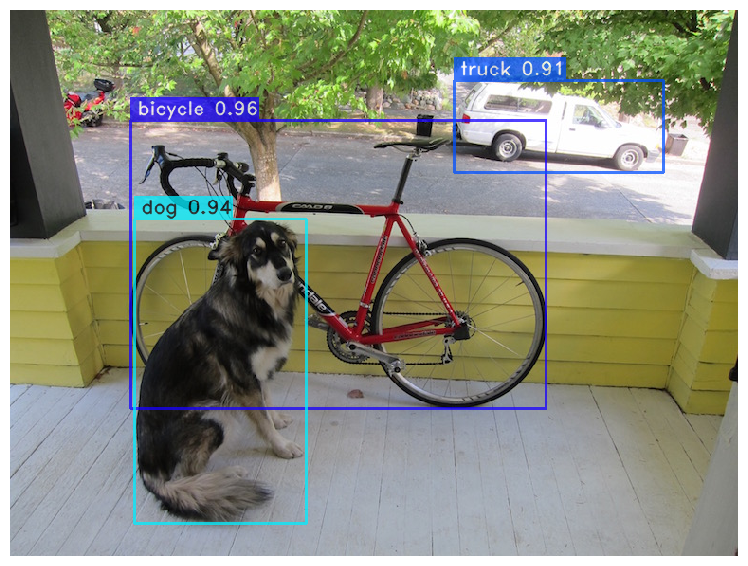

In [ ]:
out.show()

In [ ]:
# out.save("dog_bike_car_pred")

## Inference on Videos

In [ ]:
for chosen_net in ["yolo_nas_l", "yolo_nas_m", "yolo_nas_s"]:
    net = models.get(chosen_net, pretrained_weights="coco")
    net.to(device)

    print("chosen_net:", chosen_net)
    
    for video_name in os.listdir("/content/test_videos"):
        
        in_video_path = os.path.join("/content/test_videos", video_name)
        out_video_path = os.path.join("/content/predictions", video_name.replace(".mp4", f"_{chosen_net}.mp4"))
        
        print("in_video_path:",  in_video_path)
        
        net.predict(in_video_path).save(out_video_path)
    
    print()

    del net
    gc.collect()
    torch.cuda.empty_cache()

[2023-05-09 06:34:15] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


  0%|          | 0.00/256M [00:00<?, ?B/s]

Downloading: "https://sghub.deci.ai/models/yolo_nas_l_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_l_coco.pth


chosen_net: yolo_nas_l
in_video_path: /content/test_videos/traffic_new_1.mp4


Predicting Video: 100%|██████████| 1366/1366 [01:00<00:00, 22.76it/s]


in_video_path: /content/test_videos/traffic_new_2.mp4


Predicting Video: 100%|██████████| 863/863 [00:37<00:00, 22.75it/s]


in_video_path: /content/test_videos/traffic_people_distant.mp4


Predicting Video: 100%|██████████| 529/529 [00:23<00:00, 22.40it/s]


in_video_path: /content/test_videos/traffic_1.mp4


Predicting Video: 100%|██████████| 619/619 [00:27<00:00, 22.36it/s]


in_video_path: /content/test_videos/traffic_drone.mp4


Predicting Video: 100%|██████████| 586/586 [00:26<00:00, 22.24it/s]


in_video_path: /content/test_videos/kitchen_small_items.mp4


Predicting Video: 100%|██████████| 765/765 [00:34<00:00, 22.12it/s]


[2023-05-09 06:40:15] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
Downloading: "https://sghub.deci.ai/models/yolo_nas_m_coco.pth" to /root/.cache/torch/hub/checkpoints/yolo_nas_m_coco.pth


  0%|          | 0.00/196M [00:00<?, ?B/s]

chosen_net: yolo_nas_m
in_video_path: /content/test_videos/traffic_new_1.mp4


Predicting Video: 100%|██████████| 1366/1366 [00:50<00:00, 27.08it/s]


in_video_path: /content/test_videos/traffic_new_2.mp4


Predicting Video: 100%|██████████| 863/863 [00:31<00:00, 27.11it/s]


in_video_path: /content/test_videos/traffic_people_distant.mp4


Predicting Video: 100%|██████████| 529/529 [00:19<00:00, 26.79it/s]


in_video_path: /content/test_videos/traffic_1.mp4


Predicting Video: 100%|██████████| 619/619 [00:22<00:00, 27.08it/s]


in_video_path: /content/test_videos/traffic_drone.mp4


Predicting Video: 100%|██████████| 586/586 [00:21<00:00, 26.76it/s]


in_video_path: /content/test_videos/kitchen_small_items.mp4


Predicting Video: 100%|██████████| 765/765 [00:28<00:00, 27.06it/s]


[2023-05-09 06:45:35] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


chosen_net: yolo_nas_s
in_video_path: /content/test_videos/traffic_new_1.mp4


Predicting Video: 100%|██████████| 1366/1366 [00:34<00:00, 39.43it/s]


in_video_path: /content/test_videos/traffic_new_2.mp4


Predicting Video: 100%|██████████| 863/863 [00:22<00:00, 39.22it/s]


in_video_path: /content/test_videos/traffic_people_distant.mp4


Predicting Video: 100%|██████████| 529/529 [00:13<00:00, 39.37it/s]


in_video_path: /content/test_videos/traffic_1.mp4


Predicting Video: 100%|██████████| 619/619 [00:15<00:00, 38.80it/s]


in_video_path: /content/test_videos/traffic_drone.mp4


Predicting Video: 100%|██████████| 586/586 [00:14<00:00, 39.35it/s]


in_video_path: /content/test_videos/kitchen_small_items.mp4


Predicting Video: 100%|██████████| 765/765 [00:19<00:00, 39.60it/s]


In [ ]:
# !zip -rq yolo_nas_predictions.zip /content/predictions